In [259]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from tensorflow.keras import Sequential
from tensorflow import keras
import numpy as np

In [260]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [261]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

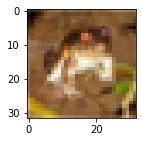

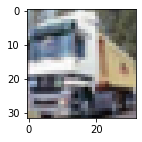

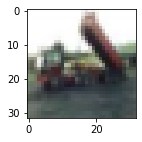

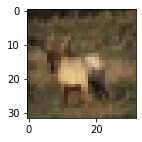

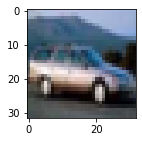

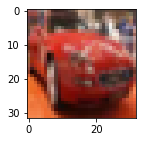

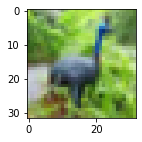

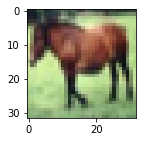

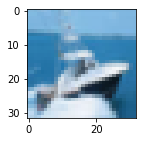

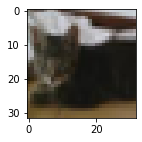

In [262]:
for i in X_train[0:10]:
    plt.figure(figsize=(2,2))
    plt.imshow(i)
    plt.show()

In [263]:
X_train.shape

(50000, 32, 32, 3)

In [264]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [265]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [266]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

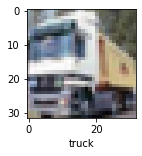

In [267]:
plot_sample(X_train,y_train,1)

**Preprocessing : Scale Images**

In [268]:
X_train=X_train/255
X_test=X_test/255

In [269]:
X_train[0].shape

(32, 32, 3)

In [270]:
y_train_cat=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_cat=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [271]:
#we will try simple Ann

In [272]:
"""
Flatten is the function that converts the pooled feature map to a single column that is passed
to the fully connected layer. Dense adds the fully connected layer to the neural network"""

'\nFlatten is the function that converts the pooled feature map to a single column that is passed\nto the fully connected layer. Dense adds the fully connected layer to the neural network'

In [273]:
from tensorflow.keras.callbacks import EarlyStopping

In [175]:
#early_stop=EarlyStopping(monitor='val_loss',patience=2)

**Net A**

In [274]:
Net_A=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    #layers.Dense(3000,activation='relu'),
    #layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')    
])
Net_A.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
history_a=Net_A.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9541 - accuracy: 0.3004 - val_loss: 2.0301 - val_accuracy: 0.2481 loss: 1.9
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8408 - accuracy: 0.3500 - val_loss: 1.9269 - val_accuracy: 0.3185
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8116 - accuracy: 0.3656 - val_loss: 1.8384 - val_accuracy: 0.3395
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7906 - accuracy: 0.3716 - val_loss: 1.8787 - val_accuracy: 0.3329
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7789 - accuracy: 0.3792 - val_loss: 1.8517 - val_accuracy: 0.3353
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7651 - accuracy: 0.3843 - val_loss: 1.8862 - val_accuracy: 0.3181
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7589 - accuracy: 0.3864 - val_loss: 1.8778 - val

In [275]:
metrics_A=pd.DataFrame(history_a.history)

In [276]:
metrics_A.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

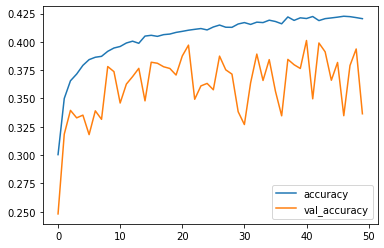

In [277]:
metrics_A[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

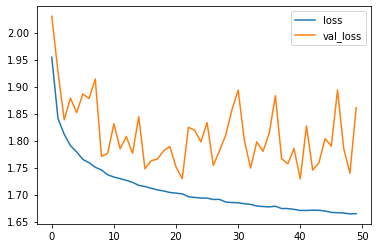

In [278]:
metrics_A[['loss','val_loss']].plot()

**Net B**

In [283]:
Net_b=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(300,activation='relu'),
    #layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')    
])
Net_b.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
history_b=Net_b.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
1563/1563 [==============================] - 15s 10ms/step - loss: 2.2885 - accuracy: 0.1238 - val_loss: 2.3025 - val_accuracy: 0.1032
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.2901 - accuracy: 0.1164 - val_loss: 2.2105 - val_accuracy: 0.1322
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0554 - accuracy: 0.2172 - val_loss: 1.8389 - val_accuracy: 0.3204
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8001 - accuracy: 0.3471 - val_loss: 1.7419 - val_accuracy: 0.3700
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7291 - accuracy: 0.3789 - val_loss: 1.7221 - val_accuracy: 0.3815
Epoch 6/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6872 - accuracy: 0.3929 - val_loss: 1.6562 - val_accuracy: 0.4083
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6555 - accuracy: 0.4048 - val_loss: 1.6452 - val_a

In [284]:
metrics_b=pd.DataFrame(history_b.history)

<AxesSubplot:>

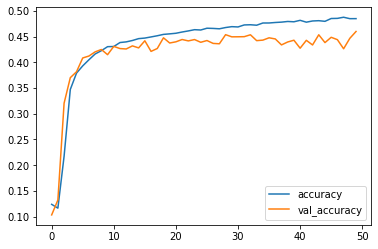

In [285]:
metrics_b[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

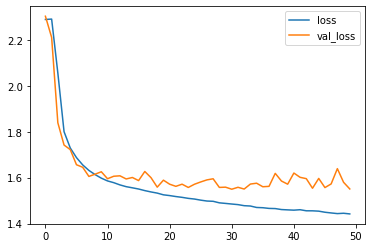

In [286]:
metrics_b[['loss','val_loss']].plot()

Adam optimizer.

Implements the Adam optimization algorithm. Adam is a stochastic gradient descent method that computes individual adaptive learning rates for different parameters from estimates of first- and second-order moments of the gradients.

**Net C**

In [ ]:
Net_C=models.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2),strides=(1, 1)),
    layers.Flatten(),
    layers.Dense(10,activation='sigmoid')    
])
Net_C.compile(optimizer='Adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
Net_C.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.4328 - accuracy: 0.4955 - val_loss: 1.3014 - val_accuracy: 0.5428
Epoch 2/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1320 - accuracy: 0.6117 - val_loss: 1.1530 - val_accuracy: 0.6066
Epoch 3/50
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0185 - accuracy: 0.6513 - val_loss: 1.0874 - val_accuracy: 0.6266
Epoch 4/50
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9427 - accuracy: 0.6776 - val_loss: 1.1378 - val_accuracy: 0.6158
Epoch 5/50
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8800 - accuracy: 0.6998 - val_loss: 1.0933 - val_accuracy: 0.6319
Epoch 6/50
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8275 - accuracy: 0.7179 - val_loss: 1.1018 - val_accuracy: 0.6334
Epoch 7/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7796 - accuracy: 0.7362 - val_loss: 1.1990 -

In [290]:
metrics_c=pd.DataFrame(Net_C.history.history)

<AxesSubplot:>

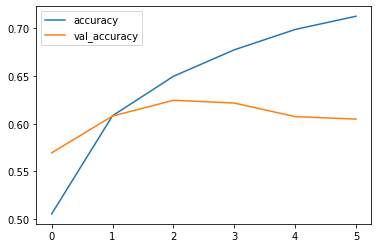

In [291]:
metrics_c[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

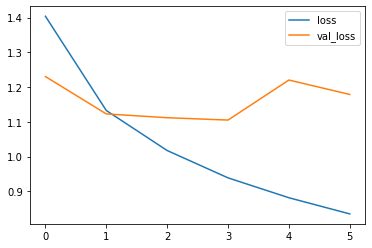

In [292]:
metrics_c[['loss','val_loss']].plot()

Text(0.5, 1.0, 'Accuracy and Value accuracy for Net_C\n')

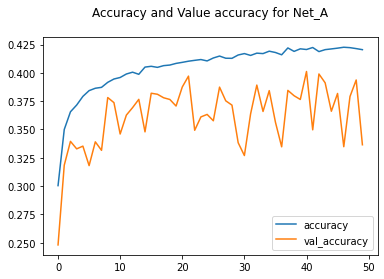

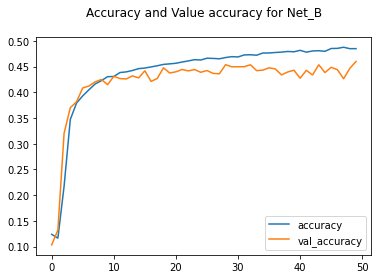

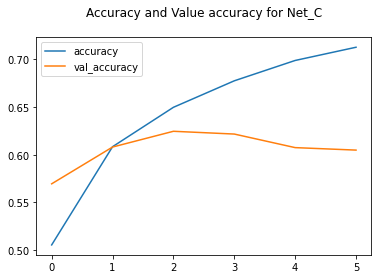

In [293]:
metrics_A[['accuracy','val_accuracy']].plot()
plt.title("Accuracy and Value accuracy for Net_A\n")
metrics_b[['accuracy','val_accuracy']].plot()
plt.title("Accuracy and Value accuracy for Net_B\n")
metrics_c[['accuracy','val_accuracy']].plot()
plt.title("Accuracy and Value accuracy for Net_C\n")

Text(0.5, 1.0, 'loss and val_loss for Net_B\n')

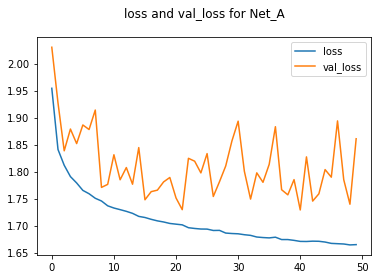

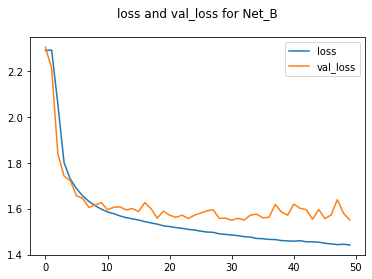

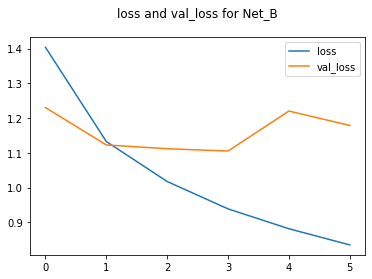

In [294]:
metrics_A[['loss','val_loss']].plot()
plt.title("loss and val_loss for Net_A\n")
'\n'
metrics_b[['loss','val_loss']].plot()
plt.title("loss and val_loss for Net_B\n")
metrics_c[['loss','val_loss']].plot()
plt.title("loss and val_loss for Net_B\n")

In [296]:
accuracy_A=metrics_A.accuracy
accuracy_B=metrics_b.accuracy
accuracy_C=metrics_c.accuracy

val_accuracy_A=metrics_A.val_accuracy
val_accuracy_B=metrics_b.val_accuracy
val_accuracy_C=metrics_c.val_accuracy

loss_A=metrics_A.loss
loss_B=metrics_b.loss
loss_C=metrics_c.loss

val_loss_A=metrics_A.val_loss
val_loss_B=metrics_b.val_loss
val_loss_C=metrics_c.val_loss


In [ ]:
accuracy_A.plot(c='g',label="Accuracy Net_A",figsize=(8,6))
accuracy_B.plot(c='b',label="Accuracy Net_B",figsize=(8,6))
accuracy_C.plot(c='r',label="Accuracy Net_C",figsize=(8,6))

val_accuracy_A.plot(c='g',label="Val Accu Net_A",figsize=(8,6),linestyle='--')
val_accuracy_B.plot(c='b',label="Val Accu Net_B",figsize=(8,6),linestyle='--')
val_accuracy_C.plot(c='r',label="Accuracy Net_C",figsize=(8,6),linestyle='--')
plt.legend()

In [ ]:
loss_A.plot(c='g',label="loss Net_A",figsize=(8,6))
loss_B.plot(c='b',label="loss Net_B",figsize=(8,6))
loss_C.plot(c='r',label="loss Net_C",figsize=(8,6))

val_loss_A.plot(c='g',label="Val Loss Net_A",figsize=(8,6),linestyle='--')
val_loss_B.plot(c='b',label="Val Loss Net_B",figsize=(8,6),linestyle='--')
val_loss_C.plot(c='r',label="Val Loss Net_C",figsize=(8,6),linestyle='--')
plt.legend()